In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
flight_train=pd.read_excel("flight_train.xlsx") 
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
flight_train.shape

(10683, 11)

In [4]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

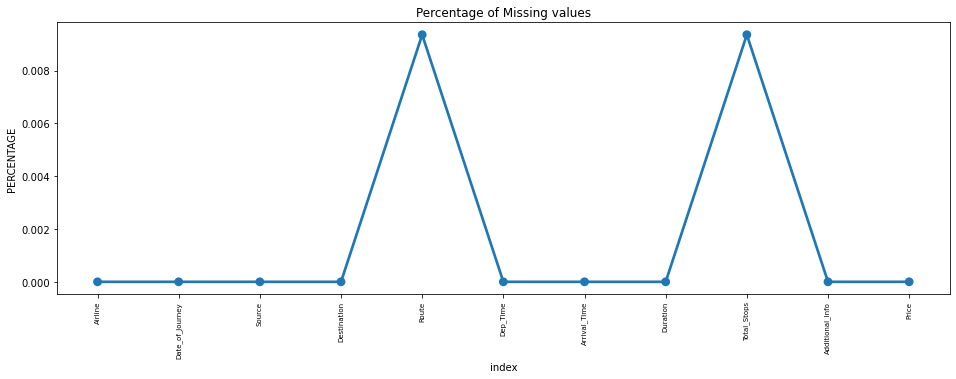

In [7]:
missing = pd.DataFrame((flight_train.isnull().sum())*100/flight_train.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [8]:
flight_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [9]:
flight_train.dropna(axis=0,inplace=True)
flight_train.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
flight_train.shape

(10682, 11)

In [11]:
flight_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [12]:
flight_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [13]:
flight_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
flight_train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [15]:
flight_train[["Journey_day", "Journey_month", "Journey_year"]] = flight_train["Date_of_Journey"].str.split("/", expand = True)
flight_train=flight_train.drop('Date_of_Journey',axis=1)
flight_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [16]:
flight_train['Journey_year'].value_counts()

2019    10682
Name: Journey_year, dtype: int64

In [17]:
flight_train.drop('Journey_year',axis=1,inplace=True)

In [18]:
flight_train["Dep_Hour_Time"]=pd.to_datetime(flight_train.Dep_Time).dt.hour
flight_train["Dep_Min_time"]=pd.to_datetime(flight_train.Dep_Time).dt.minute
flight_train=flight_train.drop('Dep_Time',axis=1)
flight_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour_Time,Dep_Min_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,05,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,06,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,05,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,01,03,16,50


In [19]:
flight_train["Arr_Hour_Time"]=pd.to_datetime(flight_train.Arrival_Time).dt.hour
flight_train["Arr_Min_time"]=pd.to_datetime(flight_train.Arrival_Time).dt.minute
flight_train=flight_train.drop('Arrival_Time',axis=1)
flight_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,03,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,05,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,06,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,05,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,01,03,16,50,21,35


In [20]:
duration=list(flight_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i]="0h "+duration[i]           # Adds 0 hour

duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [21]:
flight_train["Duration_hours"]=duration_hours
flight_train["Duration_mins"]=duration_mins


flight_train.drop(["Duration"],axis=1,inplace=True)

In [22]:
flight_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,03,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,05,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,06,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,05,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,01,03,16,50,21,35,4,45


In [23]:
flight_train["Route"].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
                                     ... 
CCU → IXA → BLR                         1
BLR → CCU → BBI → HYD → VGA → DEL       1
CCU → IXZ → MAA → BLR                   1
BOM → BLR → CCU → BBI → HYD             1
BOM → COK → MAA → HYD                   1
Name: Route, Length: 128, dtype: int64

In [24]:
flight_train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [25]:
flight_train["Additional_Info"]=flight_train["Additional_Info"].replace({'No Info':'No info'})

In [26]:
flight_train["Additional_Info"].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [27]:
flight_train.drop(['Journey_day','Journey_month',"Route",'Duration_hours','Duration_mins'],axis=1,inplace=True)

In [28]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,16,50,21,35


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

flight_train['Total_Stops']=le.fit_transform(flight_train['Total_Stops'])
flight_train['Destination']=le.fit_transform(flight_train['Destination'])
flight_train['Source']=le.fit_transform(flight_train['Source'])
flight_train['Airline']=le.fit_transform(flight_train['Airline'])
flight_train['Additional_Info']=le.fit_transform(flight_train['Additional_Info'])

In [30]:
flight_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dep_Hour_Time,Dep_Min_time,Arr_Hour_Time,Arr_Min_time
0,3,0,5,4,7,3897,22,20,1,10
1,1,3,0,1,7,7662,5,50,13,15
2,4,2,1,1,7,13882,9,25,4,25
3,3,3,0,0,7,6218,18,5,23,30
4,3,0,5,0,7,13302,16,50,21,35


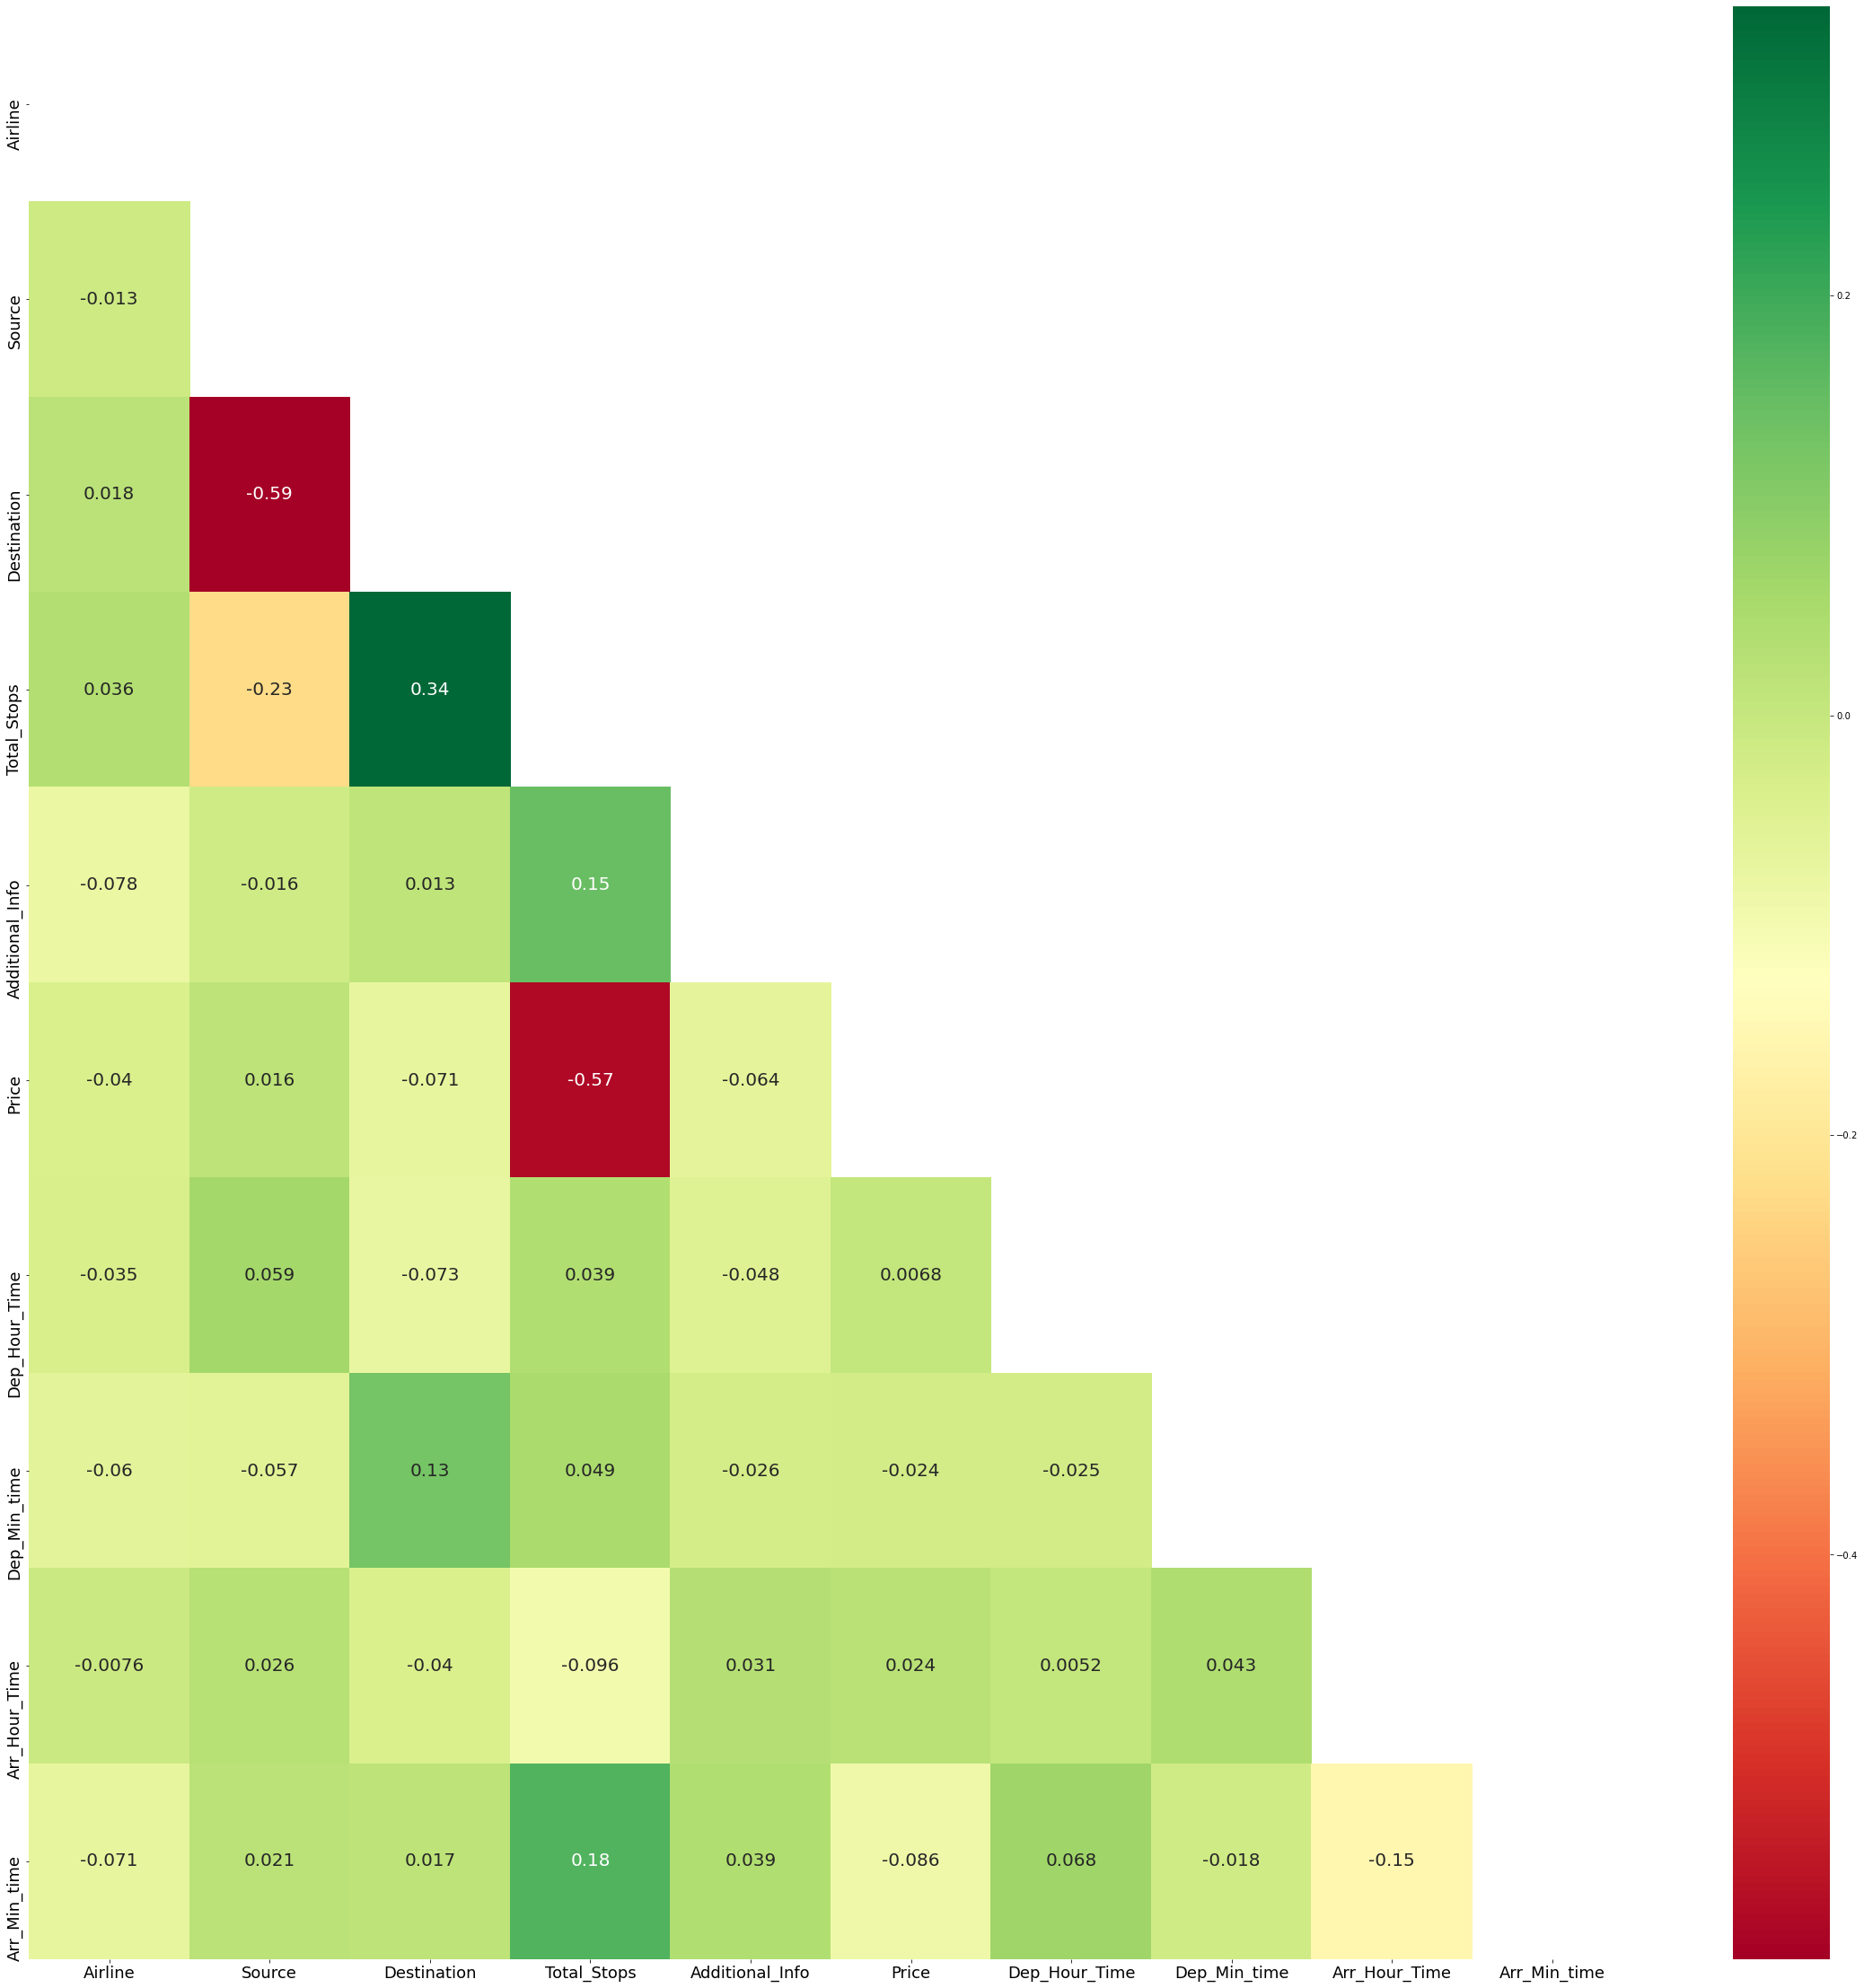

In [31]:
plt.figure(figsize=(40,40))
mask = np.triu(np.ones_like(flight_train.corr()))
res = sns.heatmap(flight_train.corr(), cmap='RdYlGn', annot=True,annot_kws={"size":20}, mask=mask)
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 18)


plt.show()

In [32]:
x=flight_train.drop('Price',axis=1)
y=flight_train['Price']

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=scaler.fit_transform(x)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
from sklearn.model_selection import train_test_split
# finding best random state
max_r2_score=0
max_rs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    error=mean_squared_error(y_test,pred)
    if r2>max_r2_score:
        max_r2_score=r2
        max_rs=i
print('\nmax_rs:',max_rs)


max_rs: 154


In [36]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=max_rs)

In [37]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:38.18
error:12244592.028535692


In [38]:
# DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:67.30
error:6476688.233420535


In [39]:
# KNeighborsRegressor
knnr=KNeighborsRegressor()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:70.35
error:5872809.041085804


In [40]:
# RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:72.11
error:5524005.783947227


In [41]:
# GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:69.64
error:6014042.898157691


In [42]:
 from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV

In [43]:
lassocv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
pred=lasso_reg.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:38.18
error:12244636.282310694


In [44]:
ridcv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridcv.fit(x_train,y_train)

alpha=ridcv.alpha_
alpha

rid_reg=Ridge(alpha)
rid_reg.fit(x_train,y_train)
pred=rid_reg.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

r2 score:38.18
error:12244592.094055926


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
m=[lr,dtr,knnr,rfr,gbr,lasso_reg,rid_reg]
for i in m:
    scr=cross_val_score(i,x,y,cv=10)
    print('\n\n----------',i,'------------')
    print(f'score:{scr.mean()*100:.2f}') 



---------- LinearRegression() ------------
score:35.02


---------- DecisionTreeRegressor() ------------
score:69.26


---------- KNeighborsRegressor() ------------
score:72.01


---------- RandomForestRegressor() ------------
score:73.66


---------- GradientBoostingRegressor() ------------
score:72.07


---------- Lasso(alpha=0.08044378755126672) ------------
score:35.02


---------- Ridge(alpha=0.001) ------------
score:35.02


In [47]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [48]:
from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7],
           "min_samples_leaf":[1,2,3,7,10],
           "min_weight_fraction_leaf":[0.1,0.4,0.7,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40] }
clf=GridSearchCV(dtr,parameters)
clf.fit(x_train,y_train)
print('best parameters',clf.best_params_)

dtr_new=clf.best_estimator_
scr_=cross_val_score(dtr_new,x,y,cv=10)
dtr_new.fit(x_train,y_train)
pred=dtr_new.predict(x_test)
r2=r2_score(y_test, pred)
error=mean_squared_error(y_test,pred)
print(f'cross validation score:{scr_.mean()*100:.2f}%\n')
print(f"r2 score:{r2*100:.2f}")
print(f'error:{error}')

best parameters {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
cross validation score:53.56%

r2 score:58.24
error:8271452.710611814


In [49]:
import pickle
filename='flight_price_final.pkl'
pickle.dump(dtr_new,open(filename,'wb'))